In [40]:
# libraries and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data = pd.read_csv('data/churn01.csv',sep=';')
display(data.head())
print(data.info())

,id,age,churn,chi_0,chi_1,sup_case_0,sup_case_1,sp_0,sp_1,logins_1,blogs_1,views_1,days_last_login_1
0,1.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0
1,2.0,67.0,0.0,62.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,-16.0,31.0
2,3.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0
3,4.0,63.0,0.0,231.0,1.0,1.0,-1.0,3.0,0.0,167.0,-8.0,21996.0,0.0
4,5.0,57.0,0.0,43.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,31.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 13 columns):
id                   6347 non-null float64
age                  6347 non-null float64
churn                6347 non-null float64
chi_0                6347 non-null float64
chi_1                6347 non-null float64
sup_case_0           6347 non-null float64
sup_case_1           6347 non-null float64
sp_0                 6347 non-null float64
sp_1                 6347 non-null float64
logins_1             6347 non-null float64
blogs_1              6347 non-null float64
views_1              6347 non-null float64
days_last_login_1    6347 non-null float64
dtypes: float64(13)
memory usage: 644.7 KB
None


In [4]:
data.iloc[:,1:7].describe()

,age,churn,chi_0,chi_1,sup_case_0,sup_case_1
count,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000
mean,13.896802,0.050890,87.316685,5.058610,0.706318,-0.006932
std,11.160078,0.219791,66.282788,30.828767,1.723961,1.870942
min,0.000000,0.000000,0.000000,-125.000000,0.000000,-29.000000
25%,5.000000,0.000000,24.500000,-8.000000,0.000000,0.000000
50%,11.000000,0.000000,87.000000,0.000000,0.000000,0.000000
75%,20.000000,0.000000,139.000000,15.000000,1.000000,0.000000
max,67.000000,1.000000,298.000000,208.000000,32.000000,31.000000


In [5]:
data.iloc[:,8:13].describe()

,sp_1,logins_1,blogs_1,views_1,days_last_login_1
count,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000
mean,0.030345,15.727903,0.157240,96.310540,1.764613
std,1.460713,42.119061,4.660607,3152.411673,17.966020
min,-4.000000,-293.000000,-75.000000,-28322.000000,-648.000000
25%,0.000000,-1.000000,0.000000,-11.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,0.000000
75%,0.000000,23.000000,0.000000,27.000000,3.000000
max,4.000000,865.000000,217.000000,230414.000000,61.000000


In [33]:
data_ch0 = data[data['churn']==0]  #data with churn = 0
data_ch1 = data[data['churn']==1]  #data with chrun = 1
data_ch0.shape

(6024, 13)

In [36]:
data.isna().sum()

id                   0
age                  0
churn                0
chi_0                0
chi_1                0
sup_case_0           0
sup_case_1           0
sp_0                 0
sp_1                 0
logins_1             0
blogs_1              0
views_1              0
days_last_login_1    0
dtype: int64

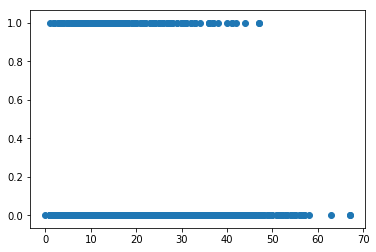

In [7]:
#Scatter plot to see how the data is distrubuted for the responsive variable churn
plt.scatter(data.age, data.churn)

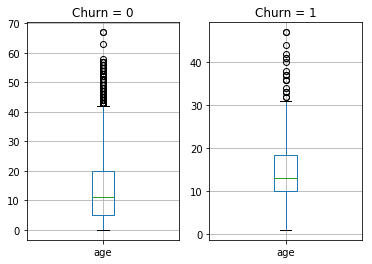

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2)
for i, df in enumerate([data_ch0, data_ch1]):
    df.boxplot('age',ax=axes[i])
axes[0].set_title('Churn = 0')
axes[1].set_title('Churn = 1')
plt.show()

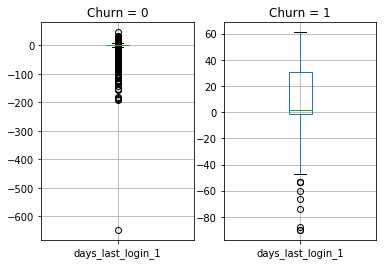

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2)
for i, df in enumerate([data_ch0, data_ch1]):
    df.boxplot('days_last_login_1',ax=axes[i])
axes[0].set_title('Churn = 0')
axes[1].set_title('Churn = 1')
plt.show()

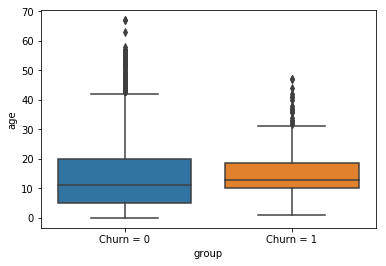

In [28]:
# Dataset:
a = pd.DataFrame({ 'group' : np.repeat('Churn = 0',data_ch0.shape[0]), 'age': data_ch0.age })
b = pd.DataFrame({ 'group' : np.repeat('Churn = 1',data_ch1.shape[0]), 'age': data_ch1.age })

df=a.append(b)

# Usual boxplot
sns.boxplot(x='group', y='age', data=df)


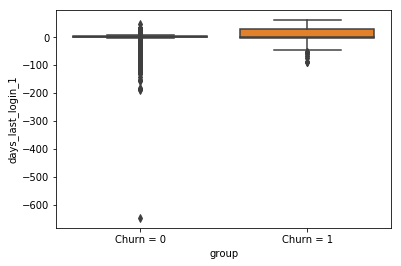

In [30]:
# Dataset:
a = pd.DataFrame({ 'group' : np.repeat('Churn = 0',data_ch0.shape[0]), 'days_last_login_1': data_ch0.days_last_login_1 })
b = pd.DataFrame({ 'group' : np.repeat('Churn = 1',data_ch1.shape[0]), 'days_last_login_1': data_ch1.days_last_login_1 })

df=a.append(b)

# Usual boxplot
sns.boxplot(x='group', y='days_last_login_1', data=df)

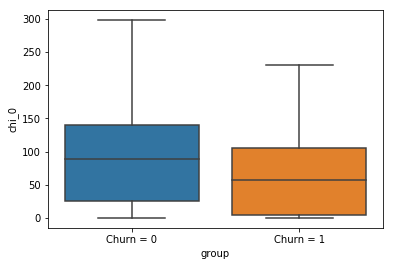

In [38]:
# Dataset:
a = pd.DataFrame({ 'group' : np.repeat('Churn = 0',data_ch0.shape[0]), 'chi_0': data_ch0.chi_0 })
b = pd.DataFrame({ 'group' : np.repeat('Churn = 1',data_ch1.shape[0]), 'chi_0': data_ch1.chi_0 })

df=a.append(b)

# Usual boxplot
sns.boxplot(x='group', y='chi_0', data=df)

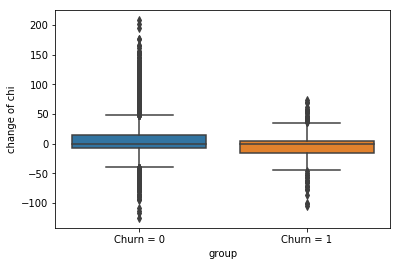

In [39]:
# Dataset:
a = pd.DataFrame({ 'group' : np.repeat('Churn = 0',data_ch0.shape[0]), 'change of chi': data_ch0.chi_1 })
b = pd.DataFrame({ 'group' : np.repeat('Churn = 1',data_ch1.shape[0]), 'change of chi': data_ch1.chi_1 })

df=a.append(b)

# Usual boxplot
sns.boxplot(x='group', y='change of chi', data=df)

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


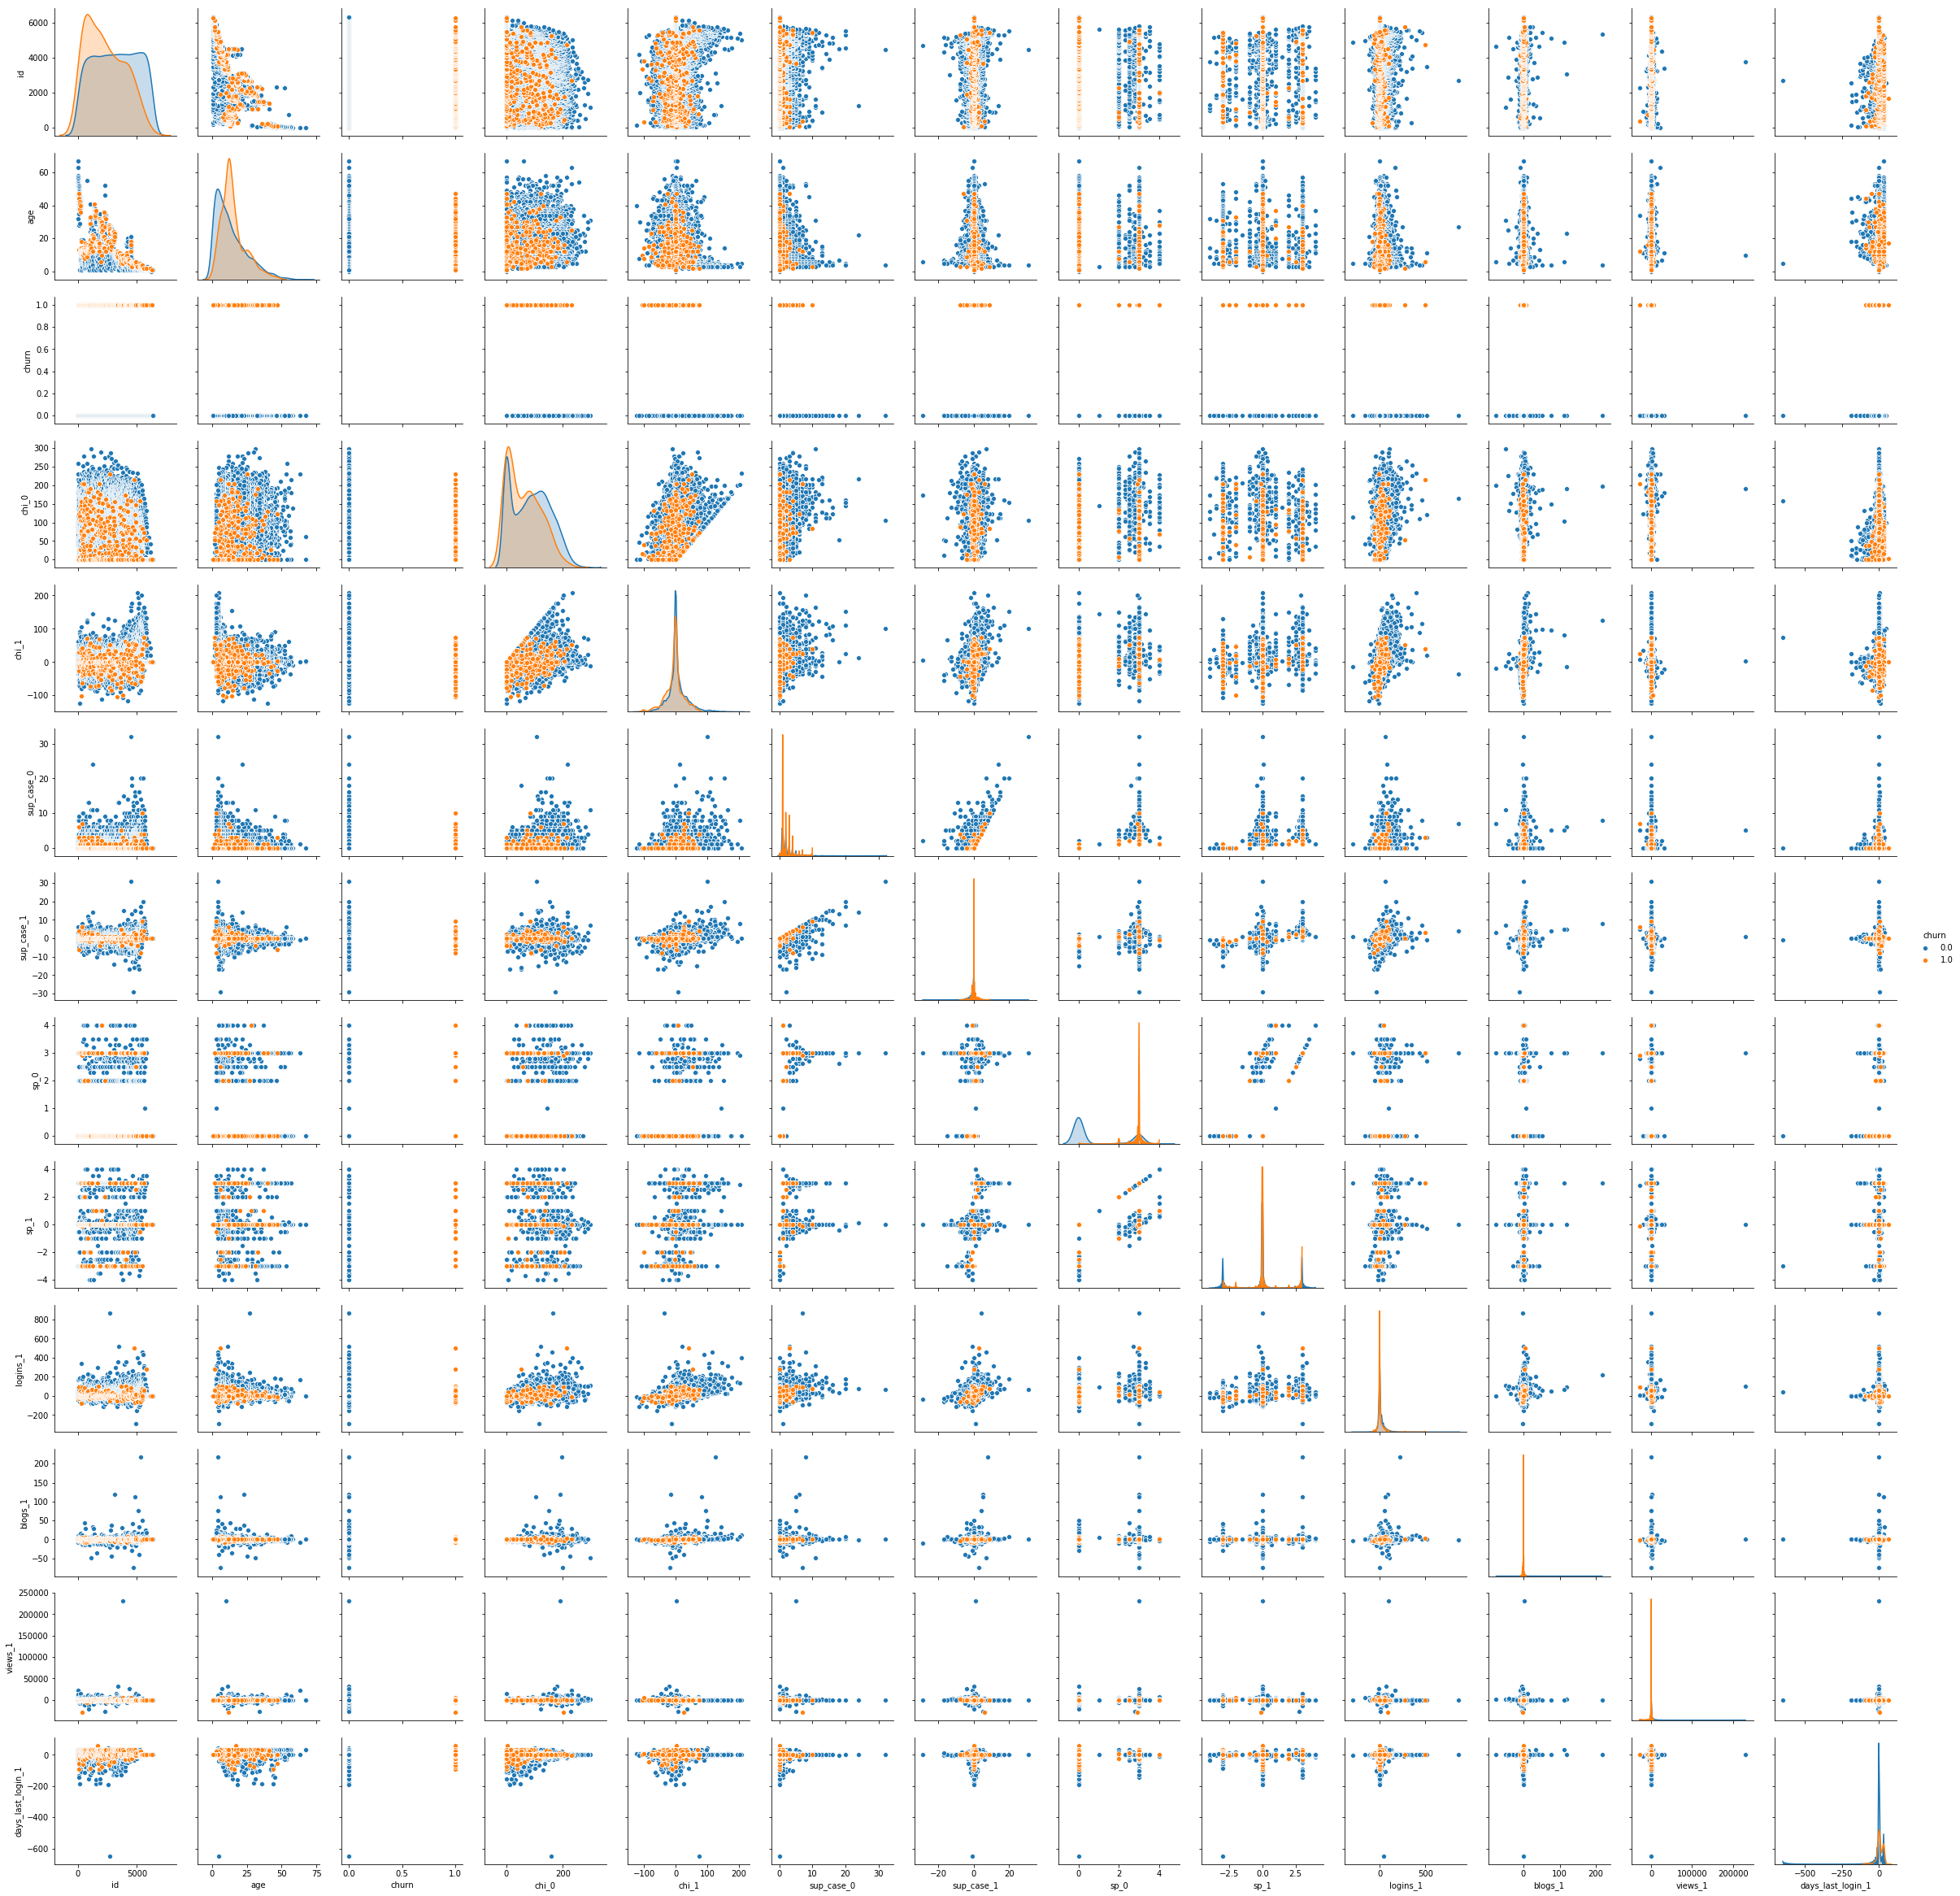

In [10]:
sns.pairplot(data, hue="churn")